In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/suchan/study/news.csv")

In [3]:
df = df.dropna()

In [4]:
df['tokens'] = df['ngrams'].apply(lambda x : ' '.join([w.split('/')[0] for w in x.split(",")]))
token_list = df['tokens'].tolist()

In [5]:
total_token_ls = [tokens.split() for tokens in token_list]
total_token_ls

[['만기',
  '국채',
  '수익률',
  'fed',
  'fed',
  '금리',
  '인상',
  '지속',
  '따르',
  '인플레이션',
  '압력',
  '완화',
  '어렵',
  '전망',
  '인플레이션',
  '제어',
  '반면',
  '만기',
  '국채',
  '수익률',
  'fed',
  '지속',
  '금리',
  '인상',
  '수준',
  '상승',
  '예측',
  '단기',
  '국채',
  '수익률',
  '상승',
  '나타나',
  '반면',
  '장기',
  '국채',
  '수익률',
  '상승',
  '제한',
  '일드커브',
  '플래트닝',
  '가속',
  '덧붙이',
  '고용창출',
  '호조',
  '수입',
  '증가',
  '견인',
  '고용시장',
  '호전',
  '소비자',
  '지출',
  '떠받치',
  '단기',
  '국채',
  '일드커브',
  '인플레이션',
  'fed',
  '고용창출',
  '고용시장',
  '수입',
  '완화'],
 ['만기',
  '국채',
  '가격',
  '최악',
  '보내',
  '만기',
  '국채',
  '수익률',
  '수준',
  '거래',
  '마감',
  '뉴욕',
  'fed',
  'fed',
  '금리',
  '인상',
  '했으나',
  '인플레이션',
  '제어',
  '예상',
  '만기',
  '국채',
  '수익률',
  '소폭',
  '수준',
  '만기',
  '국채',
  '가격',
  'fed',
  '금리',
  '인상',
  '지속',
  '최악',
  '보내',
  '덧붙이',
  'fed',
  '점진적',
  '금리',
  '인상',
  '단행',
  'fed',
  '금리',
  '인상',
  '고용시장',
  '동향',
  '예의',
  '주시',
  '반면',
  '고용창출',
  '건수',
  '호전',
  'fed',
  '공격적',
  '금리',
  '인상',
  '정책',
  '지속',
 

In [11]:
from gensim.models import FastText
model = FastText(total_token_ls[:1000], vector_size=100, window=5, workers=-1, min_count=2, sg=1, min_n=3, max_n=6)

In [12]:
model.wv.most_similar("금리")

[('물량', 0.3971256911754608),
 ('맞물린', 0.31638842821121216),
 ('매너', 0.3152826726436615),
 ('장기추세', 0.30251070857048035),
 ('비제조업', 0.293398916721344),
 ('나타난다면', 0.2901460826396942),
 ('금리동결', 0.2900277078151703),
 ('금리대', 0.28682786226272583),
 ('국방', 0.286373496055603),
 ('확산', 0.2837298810482025)]

In [13]:
model.wv.most_similar("인플레이션")

[('리플레이션', 0.49879592657089233),
 ('조세', 0.38893425464630127),
 ('연체율', 0.34637340903282166),
 ('일자리', 0.3210485875606537),
 ('다시금', 0.32001930475234985),
 ('인용', 0.3189209997653961),
 ('취약성', 0.31890228390693665),
 ('적극적', 0.31803780794143677),
 ('디플레이션', 0.3058880567550659),
 ('성격', 0.28972524404525757)]

# CNN

In [2]:
image = tf.constant([[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]], dtype=np.float32)

Metal device set to: Apple M1 Pro


2022-03-02 13:36:59.899985: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-02 13:36:59.900258: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
image.shape

TensorShape([1, 3, 3, 1])

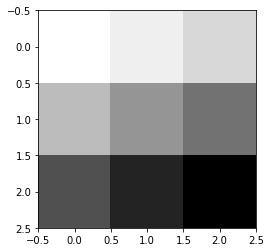

In [4]:
plt.imshow(image.numpy().reshape(3,3),cmap='Greys')
plt.show()

In [5]:
weight = np.array([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
weight.shape

(2, 2, 1, 1)

In [6]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 2, 2, 1])

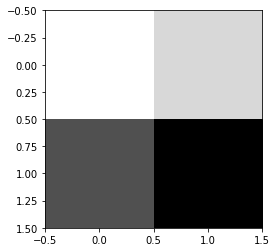

In [7]:
plt.imshow(conv2d.numpy().reshape(2,2), cmap='Greys')
plt.show()

In [8]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d.shape 

TensorShape([1, 3, 3, 1])

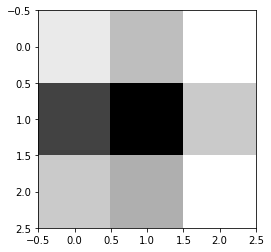

In [9]:
plt.imshow(conv2d.numpy().reshape(3,3), cmap='Greys')
plt.show()

In [10]:
weight = np.array([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
weight.shape

(2, 2, 1, 3)

In [11]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 3, 3, 3])

feature_maps shape : (3, 3, 3, 1)


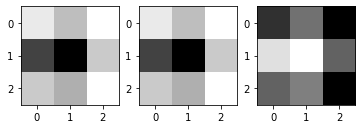

In [14]:
feature_maps = np.swapaxes(conv2d, 0, 3)
print(f"feature_maps shape : {feature_maps.shape}")

for idx, feature_map in enumerate(feature_maps):
    plt.subplot(1,3,idx+1)
    plt.imshow(feature_map.reshape(3,3), cmap='Greys')
plt.show()

In [15]:
image = tf.constant([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
image.shape

TensorShape([1, 2, 2, 1])

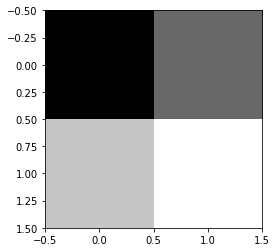

In [19]:
plt.imshow(image.numpy().reshape(2,2), cmap='Greys')
plt.show()

In [20]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


# MNIST 

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [29]:
train_images.shape

(60000, 28, 28)

In [25]:
train_images = train_images/255
test_images = test_images/255

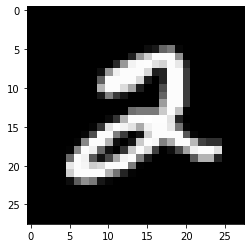

In [26]:
img = train_images[5]
plt.imshow(img, cmap='gray')

In [28]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)

In [34]:
from warnings import filters
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), strides=(2,2),
                                padding='same', kernel_initializer=weight_init)(img)

In [35]:
conv2d.shape # 5는 필터의 갯수

TensorShape([1, 14, 14, 5])

In [36]:
def display(conv2d, n, w, h):
    feature_maps = np.swapaxes(conv2d, 0, 3) # conv2d.shape에서 1(0번째)과 5(3번째)를 바꿈
    for idx, feature_map in enumerate(feature_maps):
        plt.subplot(1,n,idx+1)
        plt.imshow(feature_map.reshape(w, h), cmap='Greys')
    plt.show()

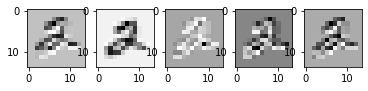

In [37]:
display(conv2d, 5, 14, 14)

In [38]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
pool.shape # padding이 same이기 때문에 14,14는 갖고오되, strides가 2,2라서 2칸씩 가기때문에 7,7

TensorShape([1, 7, 7, 5])

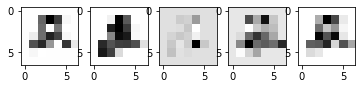

In [39]:
display(pool, 5, 7, 7)

In [4]:
from sklearn.model_selection import train_test_split

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape((-1,28,28,1))
test_images = test_images.reshape((-1,28,28,1))

train_images = train_images/255.
test_images = test_images/255.

In [16]:
valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels,
                                                                        test_size=0.15, shuffle=True)

##  Sequential

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1))) #320 -> 32*3*3 + 32
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu')) #18496 -> 32*64*3*3 + 64
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu')) #36928 -> 64*64*3*3 + 64

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

## Functional API

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inputs = Input(shape=(28,28,1))
conv1 = Conv2D(32, (3,3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2,2))(conv1)

conv2 = Conv2D(64, (3,3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2,2))(conv2)

conv3 = Conv2D(64, (3,3), activation=tf.nn.relu)(pool2)
flatten = Flatten()(conv3)

dense4 = Dense(64, activation='relu')(flatten)
outputs = Dense(10, activation='softmax')(dense4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          3692

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels,
                    validation_data=(valid_images, valid_labels),
                    epochs=100, batch_size=200)

Epoch 1/100
  5/300 [..............................] - ETA: 4s - loss: 2.2636 - accuracy: 0.2020  

2022-03-02 15:56:53.595292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


296/300 [============================>.] - ETA: 0s - loss: 0.3053 - accuracy: 0.9090

2022-03-02 15:56:57.471730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 5s 14ms/step - loss: 0.3021 - accuracy: 0.9099 - val_loss: 0.0728 - val_accuracy: 0.9749
Epoch 2/100
300/300 [==============================] - 4s 12ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0629 - val_accuracy: 0.9859
Epoch 3/100
300/300 [==============================] - 4s 12ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0530 - val_accuracy: 0.9874
Epoch 4/100
300/300 [==============================] - 4s 12ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9827
Epoch 5/100
300/300 [==============================] - 4s 12ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 6/100
300/300 [==============================] - 4s 12ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0477 - val_accuracy: 0.9890
Epoch 7/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoc

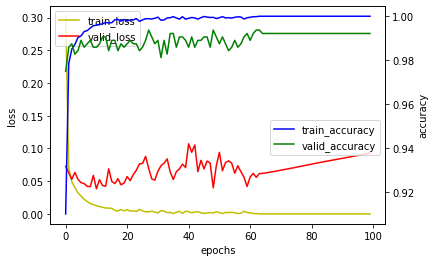

In [20]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train_loss')
loss_ax.plot(history.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()

## Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

inputs = Input(shape=(28,28,1))
conv1 = Conv2D(32, (3,3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2,2))(conv1)

conv2 = Conv2D(64, (3,3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2,2))(conv2)

conv3 = Conv2D(64, (3,3), activation=tf.nn.relu)(pool2)
flatten = Flatten()(conv3)

dense4 = Dense(64, activation='relu')(flatten)
outputs = Dense(10, activation='softmax')(dense4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/Users/suchan/study/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:5.f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path,
                                monitor='val_accuracy',
                                save_weight_only=True,
                                verbose=1,
                                save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)